In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:

df = pd.read_csv('CLEAN_FIFA21_official_data.csv')


In [3]:

# Display basic information about the dataset
df.head()  # First few rows
df.info()  # Info on data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17108 non-null  int64  
 1   ID                        17108 non-null  int64  
 2   Name                      17108 non-null  object 
 3   Age                       17108 non-null  int64  
 4   Photo                     17108 non-null  object 
 5   Nationality               17108 non-null  object 
 6   Flag                      17108 non-null  object 
 7   Overall                   17108 non-null  int64  
 8   Potential                 17108 non-null  int64  
 9   Club                      17108 non-null  object 
 10  Club Logo                 17108 non-null  object 
 11  Value(£)                  17108 non-null  float64
 12  Wage(£)                   17108 non-null  float64
 13  Special                   17108 non-null  int64  
 14  Prefer

In [4]:

# Check for missing values and duplicates
df.isnull().sum()  # Check for null values
df.duplicated().sum()  # Check for duplicate rows


0

In [5]:

# Convert 'Height(cm.)' to numeric (in case of incorrect formats)
df['Height(cm.)'] = df['Height(cm.)'].astype(float)


In [6]:

# Convert 'Weight(lbs.)' to numeric (in case of incorrect formats)
df['Weight(lbs.)'] = df['Weight(lbs.)'].astype(float)


In [7]:

# Extract Year, Month, and Day from the 'Joined' column
df[['Year', 'Month', 'Day']] = df['Joined'].str.split('-', expand=True)
df[['Year', 'Month', 'Day']] = df[['Year', 'Month', 'Day']].astype(int)

# Clean currency columns (remove symbols and convert to numeric)
def clean_currency(column):
    return df[column].replace({'€': '', 'M': 'e6', 'K': 'e3'}, regex=True).astype(float)


In [8]:

# Apply the currency cleaning function to relevant columns
df['Value(£)'] = clean_currency('Value(£)')
df['Wage(£)'] = clean_currency('Wage(£)')
df['Release Clause(£)'] = clean_currency('Release Clause(£)')


In [9]:

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_fifa21_data.csv', index=False)


In [10]:

# Basic statistics for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


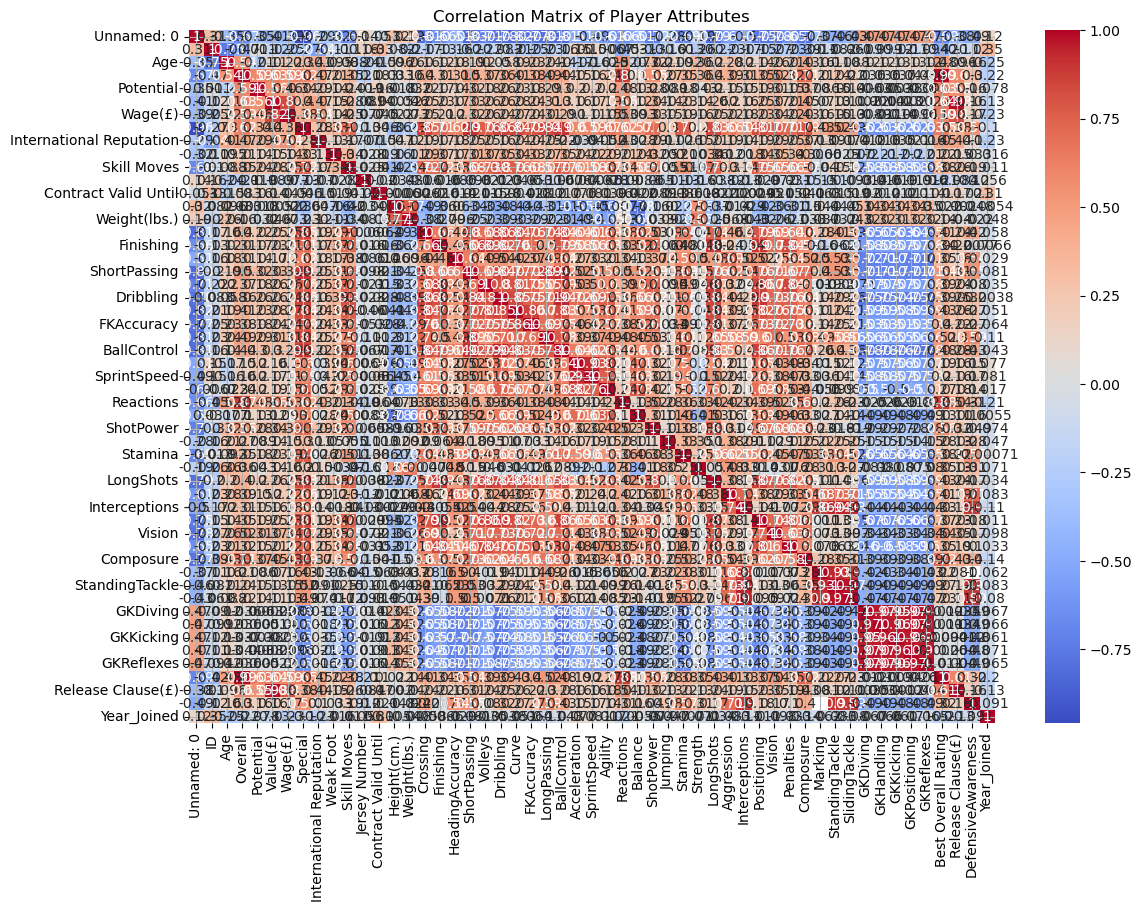

In [11]:

# Plot heatmap of correlations between numerical features
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Player Attributes')
plt.grid(True)
plt.show()


In [12]:

# Get the top player for each position (based on 'Overall' rating)
best_players = df.groupby('Best Position').apply(lambda x: x.nlargest(1, 'Overall'))
print(best_players[['Name', 'Best Position', 'Overall']])


                                    Name Best Position  Overall
Best Position                                                  
CAM           1             K. De Bruyne           CAM       91
CB            204            V. van Dijk            CB       90
CDM           23                Casemiro           CDM       89
CF            209             K. Benzema            CF       89
CM            115               T. Kroos            CM       88
GK            14060             J. Oblak            GK       91
LB            163           A. Robertson            LB       87
LM            160                 H. Son            LM       87
LW            70               Neymar Jr            LW       91
LWB           132         19 Filipe Luís           LWB       85
RB            25     T. Alexander-Arnold            RB       87
RM            117            M. Rashford            RM       85
RW            18                L. Messi            RW       93
RWB           124             17 P. Lahm

C:\Users\Abubakar\AppData\Local\Temp\ipykernel_7696\2948045056.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_players = df.groupby('Best Position').apply(lambda x: x.nlargest(1, 'Overall'))


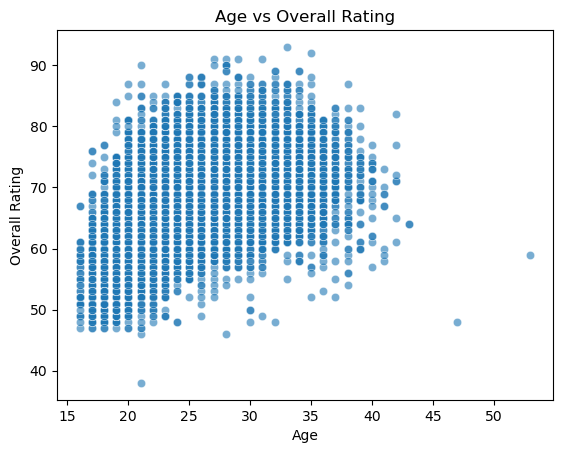

In [13]:

# Scatter plot for Age vs Overall Rating
sns.scatterplot(data=df, x='Age', y='Overall', alpha=0.6)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()


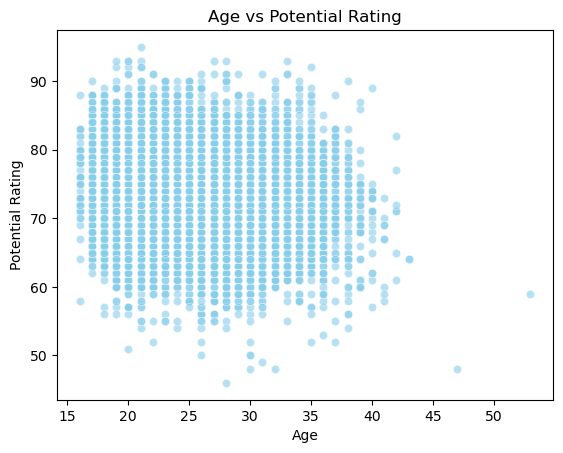

In [14]:

# Scatter plot for Age vs Potential Rating
sns.scatterplot(data=df, x='Age', y='Potential', alpha=0.6, color='skyblue')
plt.title('Age vs Potential Rating')
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.show()


In [15]:

# Create a new column for Potential Gap (Potential - Overall)
df['Potential Gap'] = df['Potential'] - df['Overall']


In [16]:

# Sort players by Potential Gap to identify undervalued players
underrated_players = df.sort_values(by='Potential Gap', ascending=False).head(20)
print(underrated_players[['Name', 'Overall', 'Potential', 'Value(£)', 'Potential Gap', 'Nationality']])


                    Name  Overall  Potential  Value(£)  Potential Gap  \
13173       B. Arrey-Mbi       60         86  425000.0             26   
14809        R. Richards       54         80  150000.0             26   
15755         A. Hajdari       53         79  120000.0             26   
15538          M. Kvinge       49         74   70000.0             25   
14099       T. Gulliksen       51         76   80000.0             25   
14536          W. Faghir       58         83  275000.0             25   
14546         S. Auklend       53         78  130000.0             25   
12945         O. Babuscu       58         83  275000.0             25   
12171           D. Leyva       56         81  200000.0             25   
13518  18 César Gelabert       57         82  230000.0             25   
14309            C. Riad       59         84  325000.0             25   
15441         T. Freeman       51         75   80000.0             24   
15644         L. Florică       51         75   7000

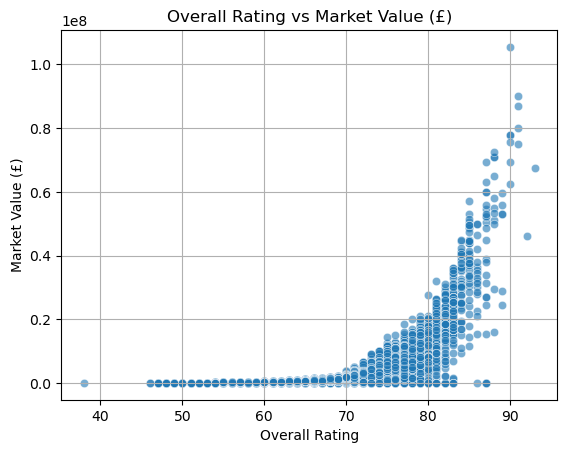

In [17]:

# Scatter plot for Overall Rating vs Market Value
sns.scatterplot(data=df, x='Overall', y='Value(£)', alpha=0.6)
plt.title('Overall Rating vs Market Value (£)')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value (£)')
plt.grid(True)
plt.show()


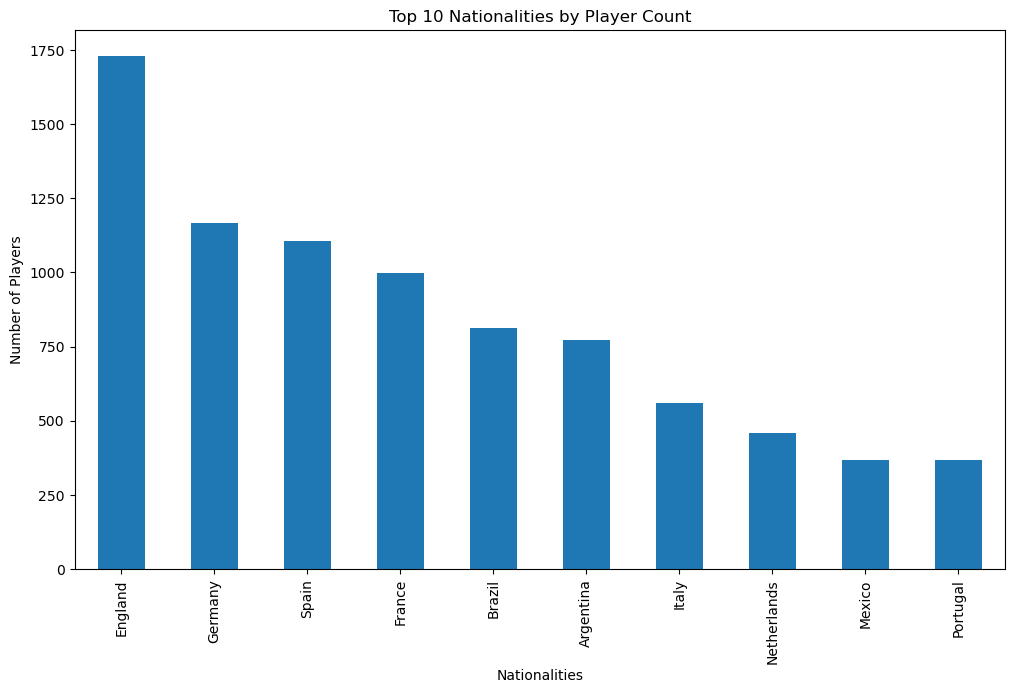

In [18]:

# Top 10 Nationalities by player count
top_Nationalities = df['Nationality'].value_counts().head(10)
top_Nationalities.plot(kind='bar', figsize=(12, 7))
plt.title('Top 10 Nationalities by Player Count')
plt.xlabel('Nationalities')
plt.ylabel('Number of Players')
plt.show()


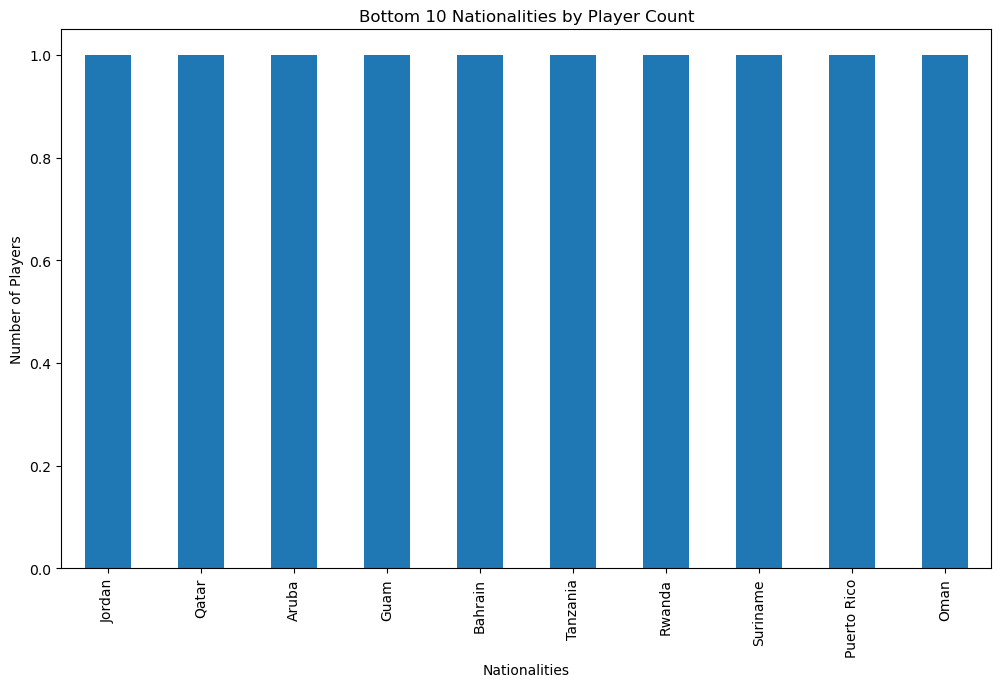

In [19]:

# Least 10 Nationalities by player count
Least_Nationalities = df['Nationality'].value_counts().tail(10)
Least_Nationalities.plot(kind='bar', figsize=(12, 7))
plt.title('Bottom 10 Nationalities by Player Count')
plt.xlabel('Nationalities')
plt.ylabel('Number of Players')
plt.show()


In [20]:

# Compute average rating by club (excluding the first row)
club_ratings = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(11)
club_ratings_without_first = club_ratings.iloc[1:]
print(club_ratings_without_first)


Club
FC Bayern München       81.461538
Siena                   79.000000
FC Anzhi Makhachkala    79.000000
Real Madrid             78.968750
Inter                   77.325000
Juventus                77.195122
FC Barcelona            77.097561
Corinthians             77.000000
Changchun Yatai FC      77.000000
Paris Saint-Germain     76.945946
Name: Overall, dtype: float64


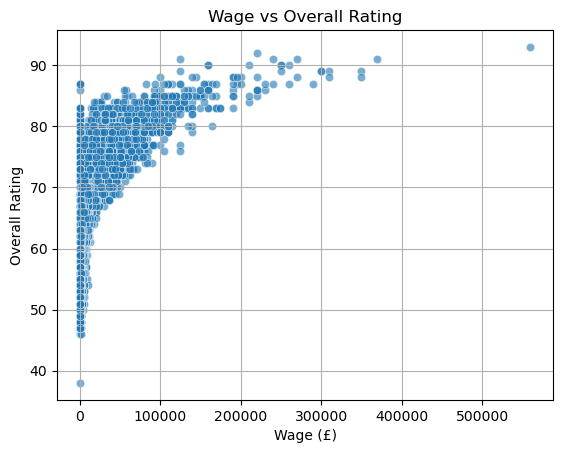

In [21]:

# Scatter plot for Wage vs Overall Rating
sns.scatterplot(data=df, x='Wage(£)', y='Overall', alpha=0.6)
plt.title('Wage vs Overall Rating')
plt.xlabel('Wage (£)')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


In [22]:

# Prepare data for predictive modeling
X = df[['Overall', 'Potential', 'Age']]  # Features
y = df['Value(£)']  # Target variable


In [23]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 15157168710515.80


In [26]:

# Filter for players under 21 years old and sort by Potential Gap
young_players = df[df['Age'] < 21]
young_high_potential = young_players.sort_values(by='Potential Gap', ascending=False).head(10)
print(young_high_potential[['Name', 'Age', 'Overall', 'Potential', 'Potential Gap']])


                    Name  Age  Overall  Potential  Potential Gap
14809        R. Richards   16       54         80             26
15755         A. Hajdari   17       53         79             26
13173       B. Arrey-Mbi   17       60         86             26
15538          M. Kvinge   17       49         74             25
14536          W. Faghir   16       58         83             25
13518  18 César Gelabert   16       57         82             25
14546         S. Auklend   17       53         78             25
12171           D. Leyva   17       56         81             25
12945         O. Babuscu   16       58         83             25
14309            C. Riad   17       59         84             25


In [27]:

# Log-transform the target variable for better predictive performance
y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [28]:

# Train the model with log-transformed target
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
mse_log = mean_squared_error(y_test_log, y_pred_log)
print(f'New Mean Squared Error (Log Transformed): {mse_log:.2f}')


New Mean Squared Error (Log Transformed): 4.18


In [29]:

# Feature importance (coefficients)
importances = model.coef_  
feature_names = X.columns
for name, coef in zip(feature_names, importances):
    print(f'{name}: {coef:.2f}')


Overall: 0.28
Potential: -0.07
Age: -0.23


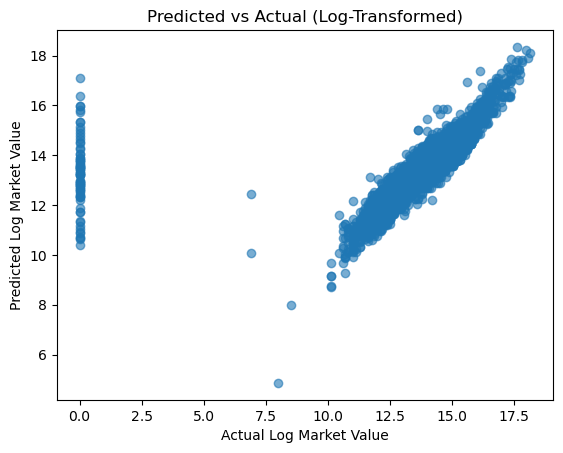

In [30]:

# Scatter plot of predicted vs actual log-transformed values
plt.scatter(y_test_log, y_pred_log, alpha=0.6)
plt.title('Predicted vs Actual (Log-Transformed)')
plt.xlabel('Actual Log Market Value')
plt.ylabel('Predicted Log Market Value')
plt.show()


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_7696\3709940734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_impact, palette='coolwarm')


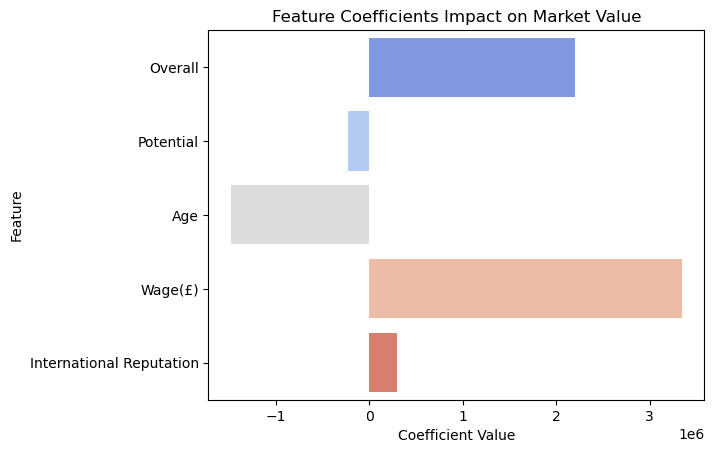

In [31]:

# Visualize feature importance
feature_impact = {
    'Feature': ['Overall', 'Potential', 'Age', 'Wage(£)', 'International Reputation'],
    'Coefficient': [2196600.43, -228080.04, -1477886.27, 3343651.86, 300469.64]
}
sns.barplot(x='Coefficient', y='Feature', data=feature_impact, palette='coolwarm')
plt.title('Feature Coefficients Impact on Market Value')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


# **FIFA 21 Player Data Analysis Project**

This project analyzes FIFA 21 player data to extract insights and build a predictive model for market values.

---

## **Table of Contents**
1. [Overview](#overview)
2. [Data Cleaning](#data-cleaning)
3. [Exploratory Analysis](#exploratory-analysis)
4. [Key Insights](#key-insights)
5. [Predictive Modeling](#predictive-modeling)
6. [Conclusion](#conclusion)

---

## **Overview**
- **Dataset Source:** Kaggle  
- **Objective:** Analyze player attributes, identify trends, and predict market values.  
- **Key Steps:** Cleaning, exploration, visualization, and modeling.

---

## **Data Cleaning**
- **Removed Missing/Duplicates:** Checked for and handled null values and duplicates.  
- **Converted Data:** Standardized columns like `Height(cm.)`, `Weight(lbs.)`, and currency fields.  
- **Extracted Features:** Split `Joined` column into `Year`, `Month`, and `Day`.  
- **Saved Data:** Exported cleaned dataset as `cleaned_fifa21_data.csv`.

---

## **Exploratory Analysis**
- **Correlation Heatmap:** Highlighted relationships between numerical attributes.  
- **Top Players by Position:** Identified the best players based on `Overall` rating.  
- **Visual Trends:**
  - **Age vs. Overall/Potential:** Scatter plots showed player development trends.  
  - **Market Value vs. Overall:** Explored value distribution with ratings.  
  - **Top Nationalities:** Bar charts of most and least represented countries.

---

## **Key Insights**
- **Potential Gap:** Identified undervalued players by comparing `Potential` and `Overall`.  
- **Market Trends:** Ratings and `Wage(£)` strongly influence player values.  
- **Club Rankings:** Computed average ratings by club for top-performing teams.

---

## **Predictive Modeling**
1. **Linear Regression:** Modeled `Value(£)` using `Overall`, `Potential`, and `Age`.
   - **MSE:** `{mse:.2f}`  
2. **Log-Transformed Regression:** Improved accuracy by transforming `Value(£)`.
   - **Log MSE:** `{mse_log:.2f}`  

---

## **Conclusion**
- **Findings:** `Overall` rating and `Wage(£)` are key drivers of market value.  
- **Next Steps:** Test advanced models for better predictions.  

---
